In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import KNNImputer
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import  RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test  = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df = pd.concat([df_train, df_test], ignore_index=True)

In [3]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')

In [7]:
print(df.isnull().sum().to_string())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
df.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,69.305795,10168.114080,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,23.344905,7886.996359,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,59.000000,7478.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,68.000000,9453.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,80.000000,11570.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [9]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

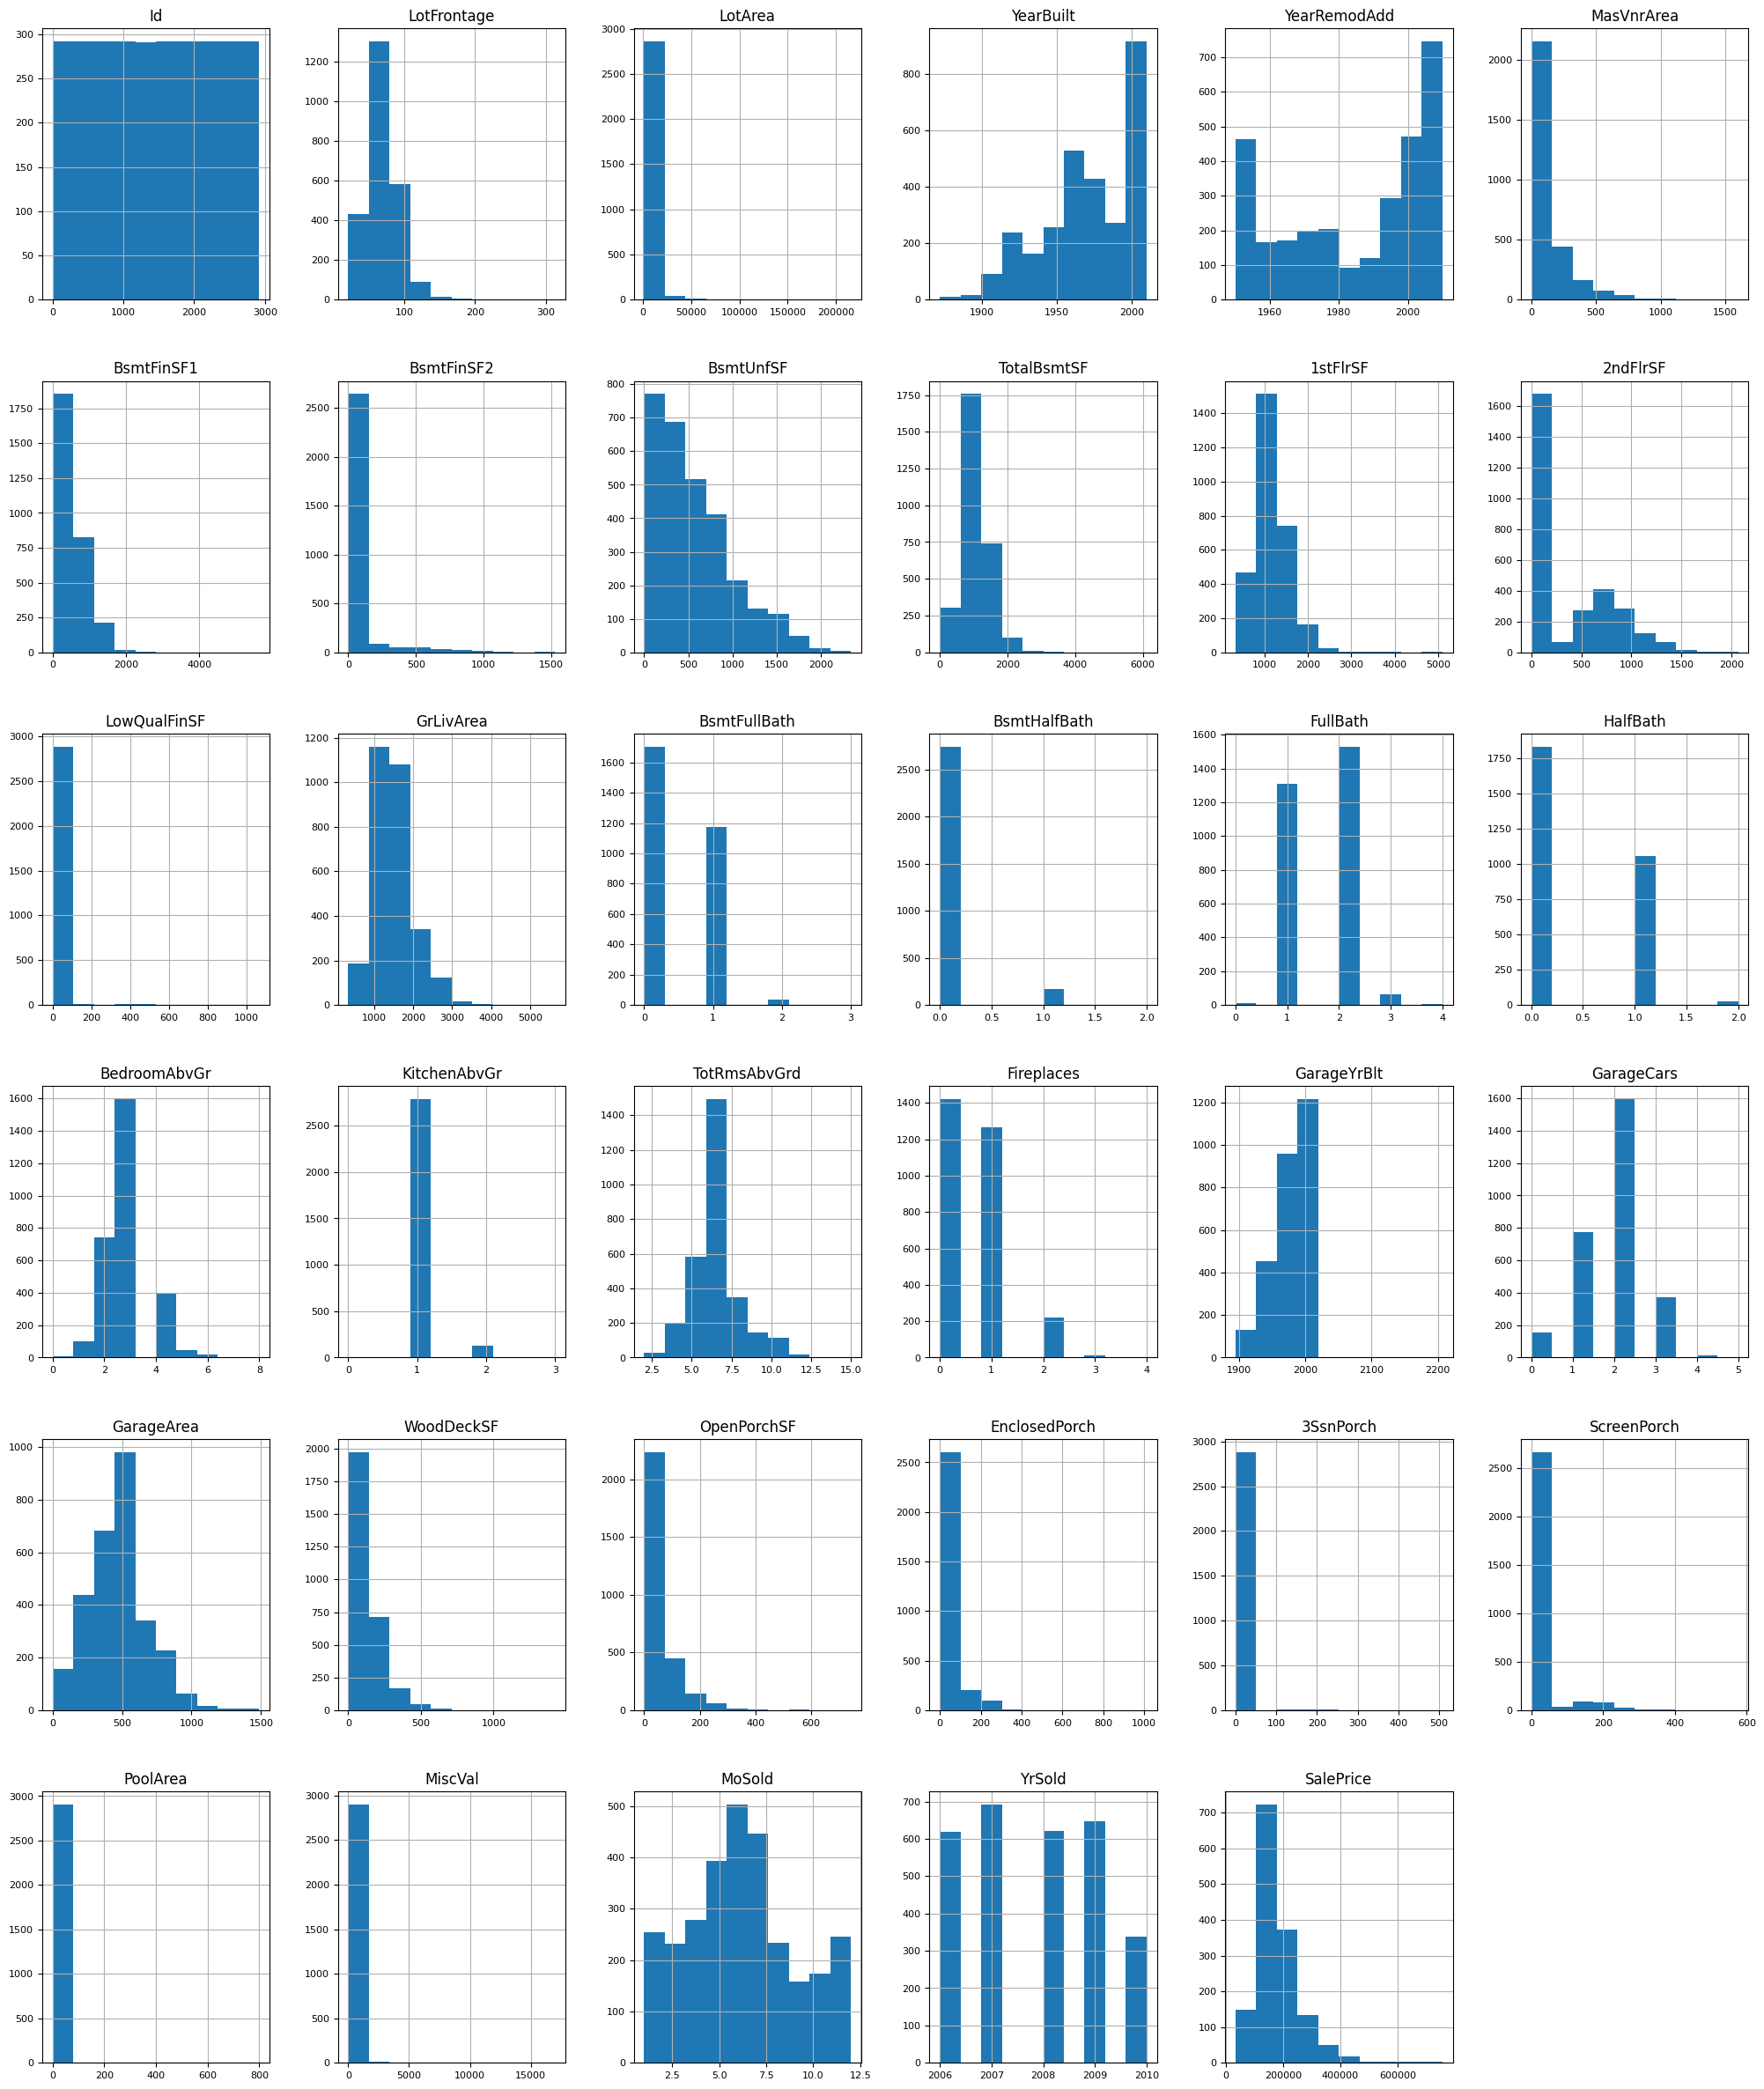

In [10]:
df_num.hist(figsize=(25, 30), xlabelsize=8, ylabelsize=8);

In [11]:
corr = df_num.corr()
corr

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,-0.027549,-0.040746,-0.016581,-0.050438,-0.025219,-0.016947,0.018251,-0.014453,-0.024924,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
LotFrontage,-0.027549,1.000000,0.489896,0.122811,0.091557,0.221079,0.219408,0.047431,0.113714,0.354822,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,0.489896,1.000000,0.024128,0.021612,0.125596,0.194031,0.084059,0.021362,0.254138,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
YearBuilt,-0.016581,0.122811,0.024128,1.000000,0.612235,0.314051,0.279581,-0.027595,0.130473,0.408515,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.091557,0.021612,0.612235,1.000000,0.196875,0.152126,-0.062153,0.165175,0.298107,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.221079,0.125596,0.314051,0.196875,1.000000,0.303490,-0.015645,0.090163,0.397240,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,0.219408,0.194031,0.279581,0.152126,0.303490,1.000000,-0.055045,-0.477404,0.536467,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420
BsmtFinSF2,0.018251,0.047431,0.084059,-0.027595,-0.062153,-0.015645,-0.055045,1.000000,-0.238241,0.089410,...,0.098399,-0.005876,0.032740,-0.023279,0.063302,0.044524,-0.005139,-0.009593,0.008883,-0.011378
BsmtUnfSF,-0.014453,0.113714,0.021362,0.130473,0.165175,0.090163,-0.477404,-0.238241,1.000000,0.412285,...,-0.039302,0.119764,0.005006,-0.005810,-0.049158,-0.032273,-0.010492,0.022607,-0.038015,0.214479
TotalBsmtSF,-0.024924,0.354822,0.254138,0.408515,0.298107,0.397240,0.536467,0.089410,0.412285,1.000000,...,0.229600,0.245521,-0.085510,0.037892,0.075363,0.072216,0.084002,0.017888,-0.011184,0.613581


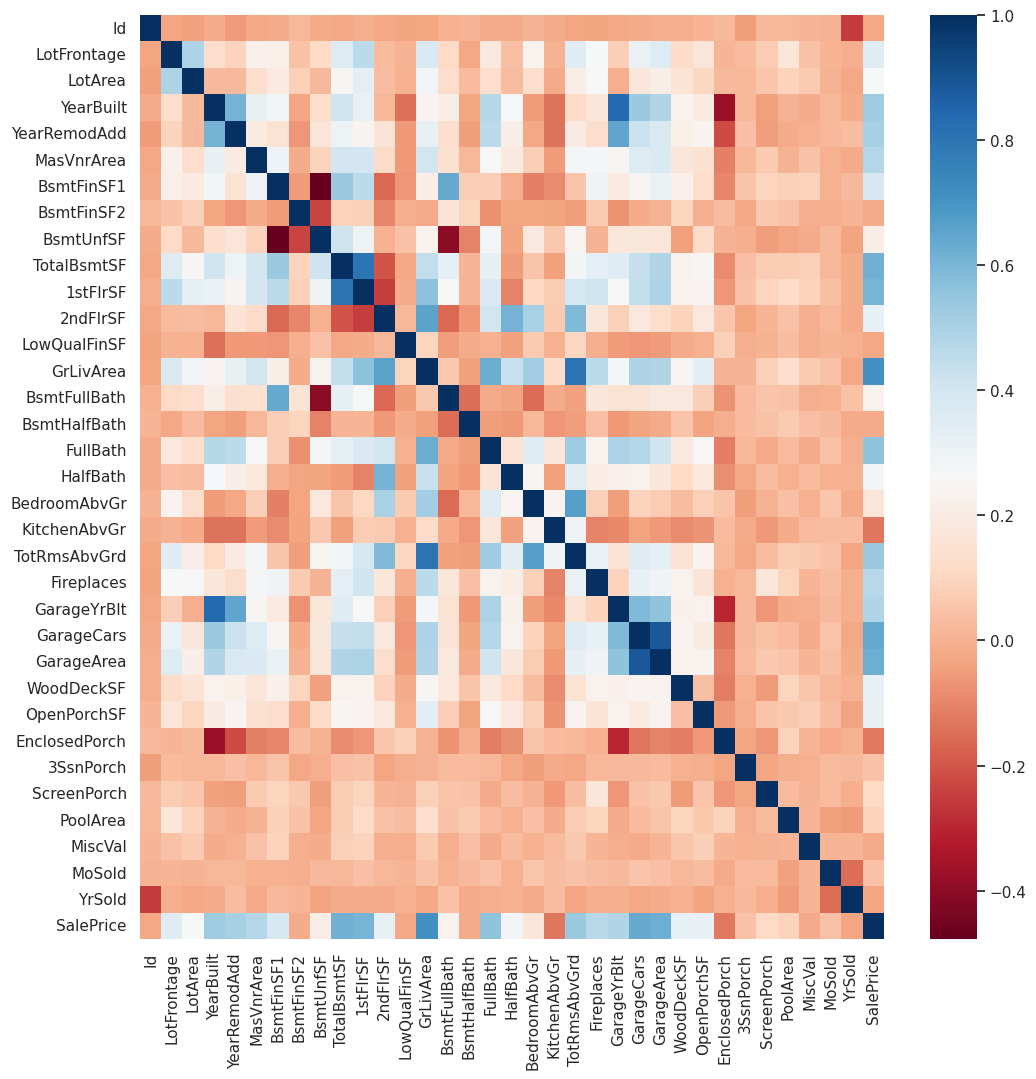

In [12]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

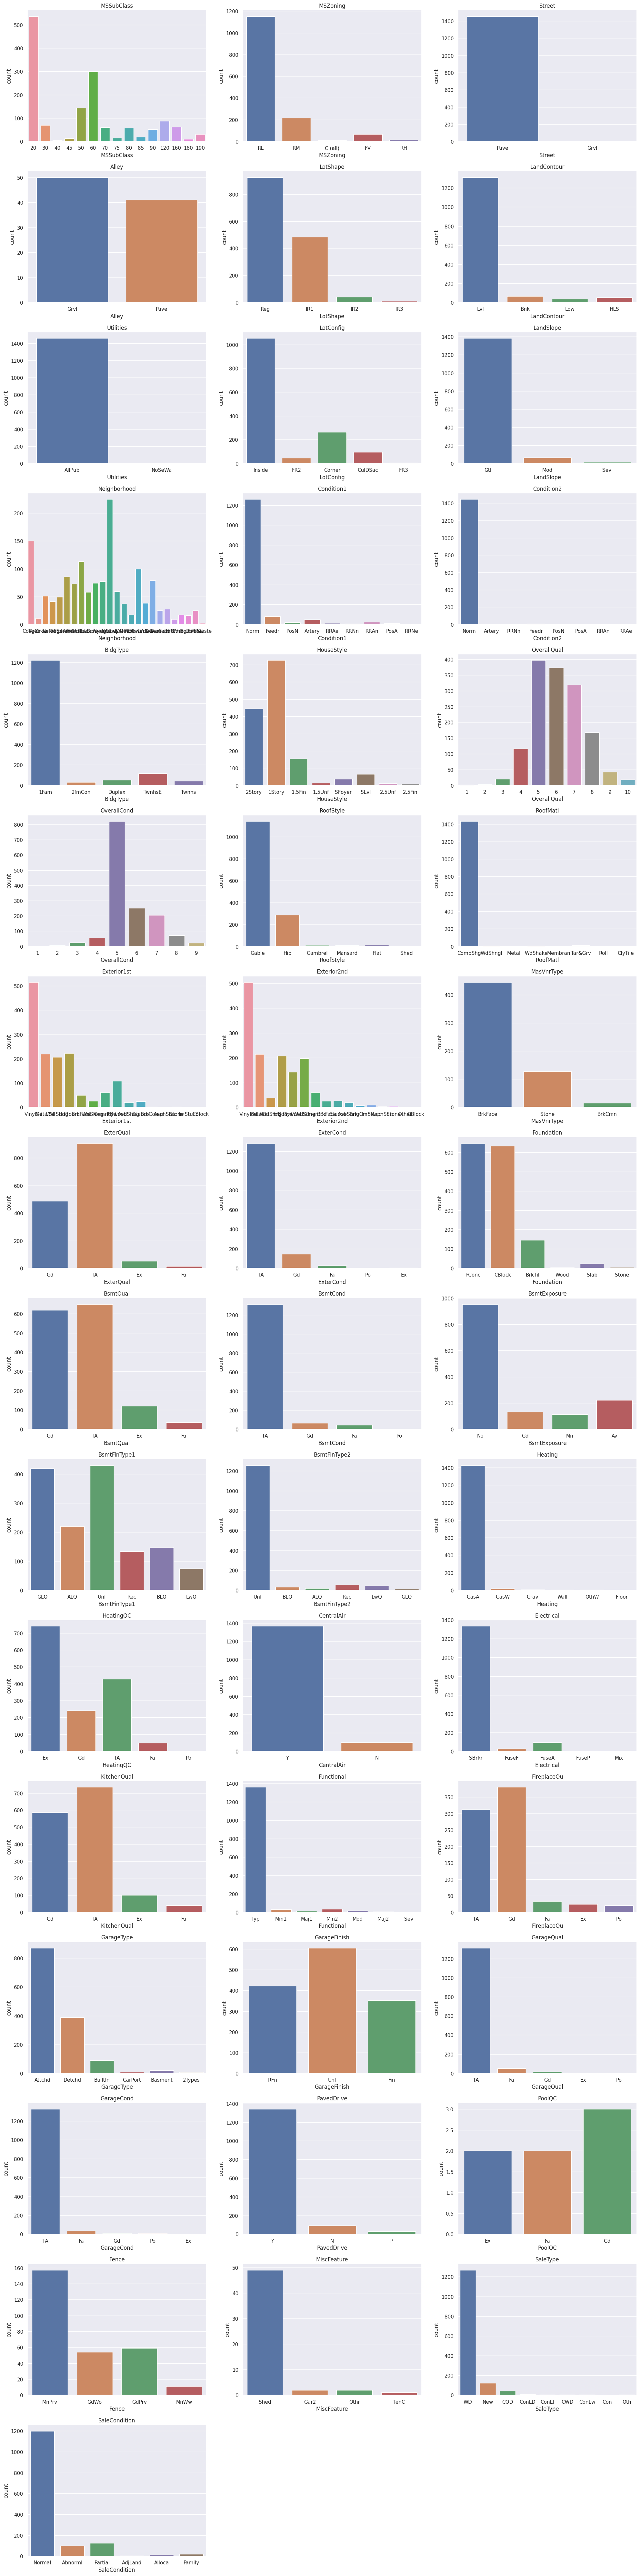

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns

num_columns = 3
num_rows = (len(categorical_columns) + num_columns - 1) // num_columns

# Set the figure size
plt.figure(figsize=(20, 5 * num_rows))

# Iterate through each categorical column and create a bar plot
for i, column in enumerate(categorical_columns):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.countplot(x=column, data=df_train)
    plt.title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
data = df.drop(columns=['Id', 'SalePrice'])

In [15]:
data_num = data.select_dtypes(include = ['float64', 'int64'])

In [16]:
data_categorical = data.select_dtypes(include = ['object'])


In [17]:
data_num

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,...,548.0,0,61,0,0,0,0,0,2,2008
1,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,...,460.0,298,0,0,0,0,0,0,5,2007
2,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,...,608.0,0,42,0,0,0,0,0,9,2008
3,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,...,642.0,0,35,272,0,0,0,0,2,2006
4,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,1970,1970,0.0,0.0,0.0,546.0,546.0,546,...,0.0,0,0,0,0,0,0,0,6,2006
2915,21.0,1894,1970,1970,0.0,252.0,0.0,294.0,546.0,546,...,286.0,0,24,0,0,0,0,0,4,2006
2916,160.0,20000,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,...,576.0,474,0,0,0,0,0,0,9,2006
2917,62.0,10441,1992,1992,0.0,337.0,0.0,575.0,912.0,970,...,0.0,80,32,0,0,0,0,700,7,2006


In [18]:
data_categorical

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2915,160,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2916,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,85,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [19]:
def convert_categorical_to_numerical(df, column_mapping):
    for column, mapping in column_mapping.items():
        df[column] = df[column].replace(mapping).infer_objects(copy=False)
    return df

In [20]:
column_mapping = {
    'MSZoning': {'A': 1, 'C (all)': 2, 'FV': 3,'I':4,'RH':5,'RL':6,'RP':7,'RM':8},
    'Street': {'Grvl': 1, 'Pave': 2},
    'Alley': {'Grvl': 1, 'Pave': 2},
    'LotShape': {'Reg': 1, 'IR1': 2,'IR2': 3, 'IR3': 4},
    'LandContour': {'Lvl': 1, 'Bnk': 2,'HLS': 3, 'Low': 4},
    'Utilities': {'AllPub': 1, 'NoSewr': 2,'NoSeWa': 3, 'ELO': 4},
    'LotConfig': {'Inside': 1, 'Corner': 2, 'CulDSac': 3,'FR2':4,'FR3':5},
    'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3},
    'Neighborhood': {'Blmngtn': 1, 'Blueste': 2, 'BrDale': 3,'BrkSide':4,'ClearCr':5,'CollgCr':6,'Crawfor':7,'Edwards':8,'Gilbert':9,'IDOTRR':10,'MeadowV':11,'Mitchel':12,'NAmes':13,'NoRidge':14,'NPkVill':15,'NridgHt':16,'NWAmes':17,'OldTown':18,'SWISU':19,'Sawyer':20,'SawyerW':21,'Somerst':22,'StoneBr':23,'Timber':24,'Veenker':25},
    'Condition1': {'Artery': 1, 'Feedr': 2, 'Norm': 3,'RRNn':4,'RRAn':5,'PosN':6,'PosA':7,'RRNe':8,'RRAe':9},
    'Condition2': {'Artery': 1, 'Feedr': 2, 'Norm': 3,'RRNn':4,'RRAn':5,'PosN':6,'PosA':7,'RRNe':8,'RRAe':9},
    'BldgType': {'1Fam': 1, '2fmCon': 2, 'Duplex': 3,'TwnhsE':4,'Twnhs':5},
    'HouseStyle': {'1Story': 1, '1.5Fin': 2, '1.5Unf': 3,'2Story':4,'2.5Fin':5,'2.5Unf':6,'SFoyer':7,'SLvl':8},
    'RoofStyle': {'Flat': 1, 'Gable': 2, 'Gambrel': 3,'Hip':4,'Mansard':5,'Shed':6},
    'RoofMatl': {'ClyTile': 1, 'CompShg': 2, 'Membran': 3,'Metal':4,'Roll':5,'Tar&Grv':6,'WdShake':7,'WdShngl':8},
    'Exterior1st': {'AsbShng': 1, 'AsphShn': 2, 'BrkComm': 3,'BrkFace':4,'CBlock':5,'CemntBd':6,'HdBoard':7,'ImStucc':8,'MetalSd':9,'Other':10,'Plywood':11,'PreCast':12,'Stone':13,'Stucco':14,'VinylSd':15,'Wd Sdng':16,'WdShing':17},
    'Exterior2nd': {'AsbShng': 1, 'AsphShn': 2, 'Brk Cmn': 3,'BrkFace':4,'CBlock':5,'CmentBd':6,'HdBoard':7,'ImStucc':8,'MetalSd':9,'Other':10,'Plywood':11,'Wd Shng':12,'Stone':13,'Stucco':14,'VinylSd':15,'Wd Sdng':16,'WdShing':17},
    'MasVnrType': {'BrkCmn': 1, 'BrkFace': 2, 'CBlock': 3,'None':4,'Stone':5},
    'ExterQual': {'Ex': 1, 'Gd': 2, 'TA': 3,'Fa':4,'Po':5},
    'ExterCond': {'Ex': 1, 'Gd': 2, 'TA': 3,'Fa':4,'Po':5},
    'Foundation': {'BrkTil': 1, 'CBlock': 2, 'PConc': 3,'Slab':4,'Stone':5,'Wood':6},
    'BsmtQual': {'Ex': 1, 'Gd': 2, 'TA': 3,'Fa':4,'Po':5},
    'BsmtCond': {'Ex': 1, 'Gd': 2, 'TA': 3,'Fa':4,'Po':5},
    'BsmtExposure': {'Gd': 1, 'Av': 2, 'Mn': 3,'No':4},
    'BsmtFinType1': {'GLQ': 1, 'ALQ': 2, 'BLQ': 3,'Rec':4,'LwQ':5,'Unf':6},
    'BsmtFinType2': {'GLQ': 1, 'ALQ': 2, 'BLQ': 3,'Rec':4,'LwQ':5,'Unf':6},
    'Heating': {'Floor': 1, 'GasA': 2, 'GasW': 3,'Grav':4,'OthW':5,'Wall':6},
    'HeatingQC': {'Ex': 1, 'Gd': 2, 'TA': 3,'Fa':4,'Po':5},
    'CentralAir':{'N':0,'Y':1},
    'Electrical':{'SBrkr': 1, 'FuseA': 2, 'FuseF': 3,'FuseP':4,'Mix':5},
    'KitchenQual': {'Ex': 1, 'Gd': 2, 'TA': 3,'Fa':4,'Po':5},
    'Functional': {'Typ': 1, 'Min1': 2, 'Min2': 3,'Mod':4,'Maj1':5,'Maj2':6,'Sev':7,'Sal':8},
    'FireplaceQu': {'Ex': 1, 'Gd': 2, 'TA': 3,'Fa':4,'Po':5},
    'GarageType': {'2Types': 1, 'Attchd': 2, 'Basment': 3,'BuiltIn':4,'CarPort':5,'Detchd':6},
    'GarageFinish': {'Fin': 1, 'RFn': 2,'Unf': 3},
    'GarageQual': {'Ex': 1, 'Gd': 2, 'TA': 3,'Fa':4,'Po':5},
    'GarageCond': {'Ex': 1, 'Gd': 2, 'TA': 3,'Fa':4,'Po':5},
    'PavedDrive':{'Y':1,'P':2,'N':3},
    'PoolQC': {'Ex': 1, 'Gd': 2, 'TA': 3,'Fa':4},
    'Fence': {'GdPrv': 1, 'MnPrv': 2, 'GdWo': 3,'MnWw':4},
    'MiscFeature': {'Elev': 1, 'Gar2': 2, 'Othr': 3,'Shed':4,'TenC':5},
    'SaleType': {'WD': 1, 'CWD': 2, 'VWD': 3,'New':4,'COD':5,'Con':6,'ConLw':7,'ConLI':8,'ConLD':9,'Oth':10},
    'SaleCondition': {'Normal': 1, 'Abnorml': 2, 'AdjLand': 3,'Alloca':4,'Family':5,'Partial':6},
    # Add more columns and mappings as needed
}

In [21]:
data_categorical = convert_categorical_to_numerical(data_categorical, column_mapping)

/tmp/ipykernel_33/3584954139.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(mapping).infer_objects(copy=False)


In [22]:
data_categorical['MSZoning'].unique()

array([ 6.,  8.,  2.,  3.,  5., nan])

In [23]:
data_categorical.head(100)


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,6.0,2,NaN,1,1,1.0,1,1,6,...,2.0,2.0,3.0,3.0,1,NaN,NaN,NaN,1.0,1
1,20,6.0,2,NaN,1,1,1.0,4,1,25,...,2.0,2.0,3.0,3.0,1,NaN,NaN,NaN,1.0,1
2,60,6.0,2,NaN,2,1,1.0,1,1,6,...,2.0,2.0,3.0,3.0,1,NaN,NaN,NaN,1.0,1
3,70,6.0,2,NaN,2,1,1.0,2,1,7,...,6.0,3.0,3.0,3.0,1,NaN,NaN,NaN,1.0,2
4,60,6.0,2,NaN,2,1,1.0,4,1,14,...,2.0,2.0,3.0,3.0,1,NaN,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,6.0,2,NaN,3,1,1.0,2,1,9,...,4.0,1.0,3.0,3.0,1,NaN,NaN,4.0,1.0,1
96,20,6.0,2,NaN,2,1,1.0,1,1,6,...,2.0,2.0,3.0,3.0,1,NaN,NaN,NaN,1.0,1
97,20,6.0,2,NaN,1,3,1.0,1,1,8,...,2.0,1.0,3.0,3.0,2,NaN,NaN,NaN,1.0,1
98,30,6.0,2,NaN,1,1,1.0,2,1,8,...,3.0,3.0,4.0,3.0,1,NaN,NaN,4.0,5.0,2


In [24]:
for column in data_categorical.columns:
    data_categorical[column] = data_categorical[column].fillna(0)

/tmp/ipykernel_33/1184184205.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_categorical[column] = data_categorical[column].fillna(0)


In [25]:
data_categorical.head(100)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,6.0,2,0.0,1,1,1.0,1,1,6,...,2.0,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1
1,20,6.0,2,0.0,1,1,1.0,4,1,25,...,2.0,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1
2,60,6.0,2,0.0,2,1,1.0,1,1,6,...,2.0,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1
3,70,6.0,2,0.0,2,1,1.0,2,1,7,...,6.0,3.0,3.0,3.0,1,0.0,0.0,0.0,1.0,2
4,60,6.0,2,0.0,2,1,1.0,4,1,14,...,2.0,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,6.0,2,0.0,3,1,1.0,2,1,9,...,4.0,1.0,3.0,3.0,1,0.0,0.0,4.0,1.0,1
96,20,6.0,2,0.0,2,1,1.0,1,1,6,...,2.0,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1
97,20,6.0,2,0.0,1,3,1.0,1,1,8,...,2.0,1.0,3.0,3.0,2,0.0,0.0,0.0,1.0,1
98,30,6.0,2,0.0,1,1,1.0,2,1,8,...,3.0,3.0,4.0,3.0,1,0.0,0.0,4.0,5.0,2


In [26]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [27]:
print(data_categorical.isnull().sum().to_string())

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0


In [28]:
print(data_num.isnull().sum().to_string())

LotFrontage      486
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0


In [29]:
# Initialize the KNNImputer with the desired number of neighbors (e.g., 5)
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
imputed_data = knn_imputer.fit_transform(data_num)

# Convert the imputed data array back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=data_num.columns)

In [30]:
print(imputed_df.isnull().sum().to_string())

LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0


In [31]:
data_clean = pd.concat([imputed_df, data_categorical], axis=1)

In [32]:
data_clean

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,2.0,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,2.0,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,2.0,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,6.0,3.0,3.0,3.0,1,0.0,0.0,0.0,1.0,2
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,2.0,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936.0,1970.0,1970.0,0.0,0.0,0.0,546.0,546.0,546.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,1
2915,21.0,1894.0,1970.0,1970.0,0.0,252.0,0.0,294.0,546.0,546.0,...,5.0,3.0,3.0,3.0,1,0.0,0.0,0.0,1.0,2
2916,160.0,20000.0,1960.0,1996.0,0.0,1224.0,0.0,0.0,1224.0,1224.0,...,6.0,3.0,3.0,3.0,1,0.0,0.0,0.0,1.0,2
2917,62.0,10441.0,1992.0,1992.0,0.0,337.0,0.0,575.0,912.0,970.0,...,0.0,0.0,0.0,0.0,1,0.0,2.0,4.0,1.0,1


In [33]:
data_clean['SalePrice']=df['SalePrice']

In [34]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2919 non-null   float64
 1   LotArea        2919 non-null   float64
 2   YearBuilt      2919 non-null   float64
 3   YearRemodAdd   2919 non-null   float64
 4   MasVnrArea     2919 non-null   float64
 5   BsmtFinSF1     2919 non-null   float64
 6   BsmtFinSF2     2919 non-null   float64
 7   BsmtUnfSF      2919 non-null   float64
 8   TotalBsmtSF    2919 non-null   float64
 9   1stFlrSF       2919 non-null   float64
 10  2ndFlrSF       2919 non-null   float64
 11  LowQualFinSF   2919 non-null   float64
 12  GrLivArea      2919 non-null   float64
 13  BsmtFullBath   2919 non-null   float64
 14  BsmtHalfBath   2919 non-null   float64
 15  FullBath       2919 non-null   float64
 16  HalfBath       2919 non-null   float64
 17  BedroomAbvGr   2919 non-null   float64
 18  KitchenA

In [35]:
# columns_to_convert = ['Exterior1st', 'Exterior2nd', 'MSZoning']
# datav[columns_to_convert] = datav[columns_to_convert].astype(float)


In [36]:
train=data_clean[data_clean['SalePrice'].notnull()]
test=data_clean[data_clean['SalePrice'].isnull()]

In [37]:
train

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1,208500.0
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1,181500.0
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1,223500.0
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,3.0,3.0,3.0,1,0.0,0.0,0.0,1.0,2,140000.0
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,1999.0,2000.0,0.0,0.0,0.0,953.0,953.0,953.0,...,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1,175000.0
1456,85.0,13175.0,1978.0,1988.0,119.0,790.0,163.0,589.0,1542.0,2073.0,...,3.0,3.0,3.0,1,0.0,2.0,0.0,1.0,1,210000.0
1457,66.0,9042.0,1941.0,2006.0,0.0,275.0,0.0,877.0,1152.0,1188.0,...,2.0,3.0,3.0,1,0.0,1.0,4.0,1.0,1,266500.0
1458,68.0,9717.0,1950.0,1996.0,0.0,49.0,1029.0,0.0,1078.0,1078.0,...,3.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1,142125.0


In [38]:
test=test.drop(columns=['SalePrice'])

In [39]:
test

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1460,80.0,11622.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,...,2.0,3.0,3.0,3.0,1,0.0,2.0,0.0,1.0,1
1461,81.0,14267.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,...,2.0,3.0,3.0,3.0,1,0.0,0.0,2.0,1.0,1
1462,74.0,13830.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,...,2.0,1.0,3.0,3.0,1,0.0,2.0,0.0,1.0,1
1463,78.0,9978.0,1998.0,1998.0,20.0,602.0,0.0,324.0,926.0,926.0,...,2.0,1.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1
1464,43.0,5005.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,1280.0,1280.0,...,2.0,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936.0,1970.0,1970.0,0.0,0.0,0.0,546.0,546.0,546.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,1
2915,21.0,1894.0,1970.0,1970.0,0.0,252.0,0.0,294.0,546.0,546.0,...,5.0,3.0,3.0,3.0,1,0.0,0.0,0.0,1.0,2
2916,160.0,20000.0,1960.0,1996.0,0.0,1224.0,0.0,0.0,1224.0,1224.0,...,6.0,3.0,3.0,3.0,1,0.0,0.0,0.0,1.0,2
2917,62.0,10441.0,1992.0,1992.0,0.0,337.0,0.0,575.0,912.0,970.0,...,0.0,0.0,0.0,0.0,1,0.0,2.0,4.0,1.0,1


## **MODELS**

In [40]:
X_train=train.drop(columns=['SalePrice'])
y_train=train['SalePrice']

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenAbvGr 

In [42]:
models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor(verbose=0)),
          ("CatBoost", CatBoostRegressor(verbose=False))]

In [43]:
def evaluate_models(models, X, y):
    results = []
    for name, regressor in models:
       
        r2_score = cross_val_score(regressor, X, y, cv=5, scoring="r2").mean()

        rmse_value = np.mean(np.sqrt(abs(cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error"))))

        result = pd.DataFrame({"Model": [name], "RMSE": [round(rmse_value, 4)], "R2 Score": [round(r2_score, 4)]})
        results.append(result)

    all_results = pd.concat(results, ignore_index=True)
    return all_results

evaluate_models(models, X_train, y_train)

,Model,RMSE,R2 Score
0,LR,35075.8713,0.7966
1,KNN,46942.1231,0.6484
2,CART,42412.8570,0.7228
3,RF,29953.2191,0.8566
4,GBM,26004.2033,0.8905
5,XGBoost,27309.8847,0.8800
6,LightGBM,28882.6132,0.8662
7,CatBoost,26029.8736,0.8914


In [45]:
# CatBoost Regressor
catboost_model = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')

# Let's now look at the iterations, as we've already found the optimal values for learning rate and depth.
catboost_params = {"iterations": [300,500,1000,2000],
                   "learning_rate": [0.08, 0.1],
                   "depth": [5,8,10]}

catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)
catboost_best_grid.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'depth': 8, 'iterations': 2000, 'learning_rate': 0.08}

In [46]:
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X_train, y_train)

In [47]:
model2 = [('CatBoost', catboost_final)]
evaluate_models(model2,X_train, y_train)

,Model,RMSE,R2 Score
0,CatBoost,26804.1373,0.8855


In [48]:
test

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1460,80.0,11622.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,...,2.0,3.0,3.0,3.0,1,0.0,2.0,0.0,1.0,1
1461,81.0,14267.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,...,2.0,3.0,3.0,3.0,1,0.0,0.0,2.0,1.0,1
1462,74.0,13830.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,...,2.0,1.0,3.0,3.0,1,0.0,2.0,0.0,1.0,1
1463,78.0,9978.0,1998.0,1998.0,20.0,602.0,0.0,324.0,926.0,926.0,...,2.0,1.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1
1464,43.0,5005.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,1280.0,1280.0,...,2.0,2.0,3.0,3.0,1,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936.0,1970.0,1970.0,0.0,0.0,0.0,546.0,546.0,546.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,1
2915,21.0,1894.0,1970.0,1970.0,0.0,252.0,0.0,294.0,546.0,546.0,...,5.0,3.0,3.0,3.0,1,0.0,0.0,0.0,1.0,2
2916,160.0,20000.0,1960.0,1996.0,0.0,1224.0,0.0,0.0,1224.0,1224.0,...,6.0,3.0,3.0,3.0,1,0.0,0.0,0.0,1.0,2
2917,62.0,10441.0,1992.0,1992.0,0.0,337.0,0.0,575.0,912.0,970.0,...,0.0,0.0,0.0,0.0,1,0.0,2.0,4.0,1.0,1


In [50]:
predict = catboost_final.predict(test)

In [51]:
predict 

array([122348.13779218, 168753.09233545, 192890.79880862, ...,
       163884.96040837, 121563.67022763, 223554.69483436])

In [52]:
submission = pd.DataFrame({"Id": df_test['Id'], "SalePrice": predict})

In [57]:
submission

,Id,SalePrice
0,1461,122348.137792
1,1462,168753.092335
2,1463,192890.798809
3,1464,196193.124473
4,1465,189830.181576
...,...,...
1454,2915,84068.428378
1455,2916,81113.332325
1456,2917,163884.960408
1457,2918,121563.670228


In [56]:
submission.to_csv("submission.csv", index=False)